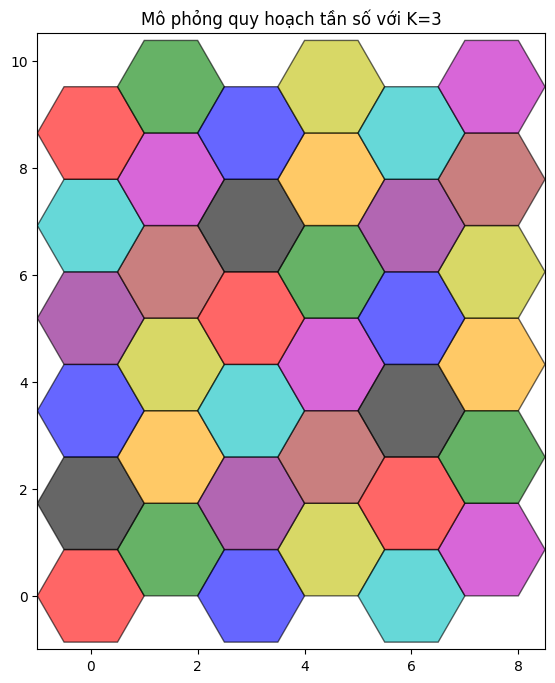

Các vị trí cell đồng kênh với K=3: [(-2, 1), (-1, -1), (-1, 2), (1, -2), (1, 1), (2, -1)]



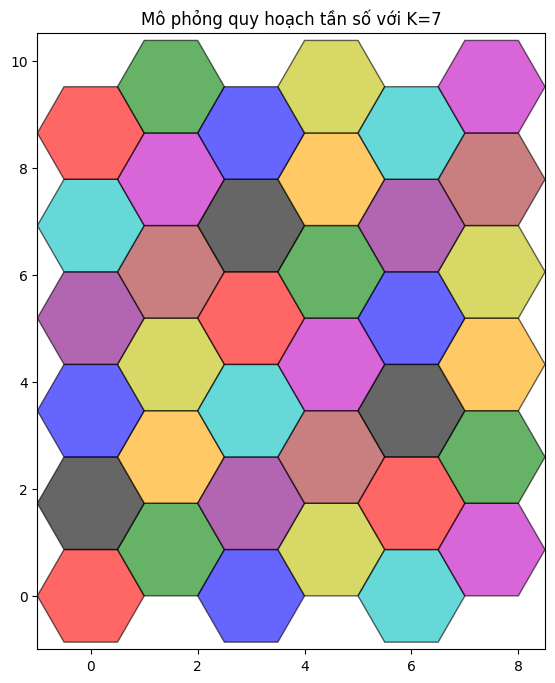

Các vị trí cell đồng kênh với K=7: [(-3, 1), (-3, 2), (-2, -1), (-2, 3), (-1, -2), (-1, 3), (1, -3), (1, 2), (2, -3), (2, 1), (3, -2), (3, -1)]



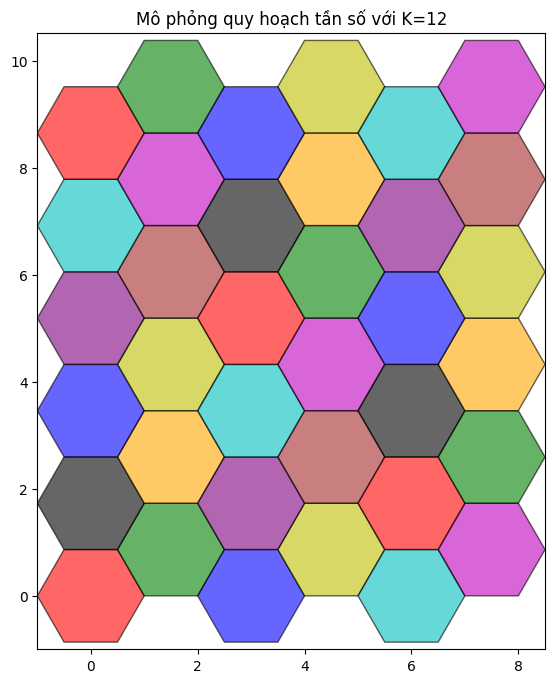

Các vị trí cell đồng kênh với K=12: [(-4, 2), (-2, -2), (-2, 4), (2, -4), (2, 2), (4, -2)]



In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hex_grid(rows, cols, radius):
    """ Tạo lưới tổ ong với bán kính cell nhất định. """
    dx = 3/2 * radius
    dy = np.sqrt(3) * radius
    
    grid = []
    for i in range(rows):
        for j in range(cols):
            x = j * dx
            y = i * dy
            if j % 2 == 1:
                y += dy / 2  # Dịch dòng lẻ xuống
            grid.append((x, y))
    return np.array(grid)

def draw_cells(grid, K, radius):
    """ Vẽ sơ đồ cell với K cụm tần số khác nhau. """
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'brown']
    plt.figure(figsize=(8, 8))
    for i, (x, y) in enumerate(grid):
        cell_color = colors[i % len(colors)]  # Đảm bảo không vượt quá danh sách màu
        hexagon = plt.Polygon(
            [(x + radius * np.cos(theta), y + radius * np.sin(theta)) for theta in np.linspace(0, 2*np.pi, 7)],
            edgecolor='black', facecolor=cell_color, alpha=0.6)
        plt.gca().add_patch(hexagon)
    plt.xlim(-radius, np.max(grid[:, 0]) + radius)
    plt.ylim(-radius, np.max(grid[:, 1]) + radius)
    plt.gca().set_aspect('equal')
    plt.title(f"Mô phỏng quy hoạch tần số với K={K}")
    plt.show()

def calculate_cluster_positions(K):
    """ Xác định vị trí của các cell đồng kênh dựa trên công thức K = i^2 + ij + j^2. """
    positions = []
    for i in range(-K, K+1):
        for j in range(-K, K+1):
            if i**2 + i*j + j**2 == K:
                positions.append((i, j))
    return positions

# Mô phỏng với K = 3, 7, 12
radius = 1  # Giả định bán kính cell
for K in [3, 7, 12]:
    grid = generate_hex_grid(6, 6, radius)
    draw_cells(grid, K, radius)
    cluster_positions = calculate_cluster_positions(K)
    print(f"Các vị trí cell đồng kênh với K={K}: {cluster_positions}\n")


Khoảng cách giữa các cell đồng kênh với K=7: 4.58
Mức nhiễu đồng kênh (giả định) với K=7: 0.0476

Khoảng cách giữa các cell đồng kênh với K=12: 6.00
Mức nhiễu đồng kênh (giả định) với K=12: 0.0278



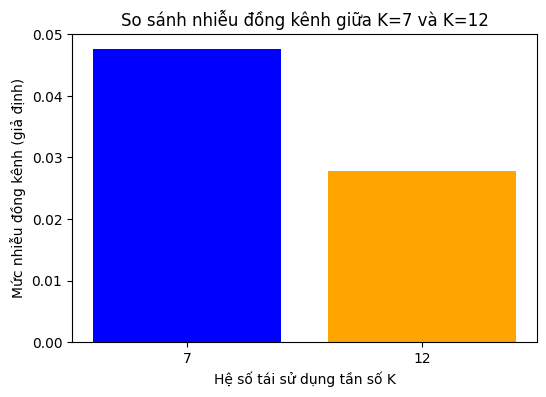

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_cochannel_distance(K, R):
    """ Tính khoảng cách giữa các cell đồng kênh. """
    return R * np.sqrt(3 * K)

def cochannel_interference(D):
    """ Tính mức nhiễu đồng kênh (giả định) dựa trên khoảng cách D. """
    return 1 / D**2  # Mô hình đơn giản: nhiễu tỷ lệ nghịch với bình phương khoảng cách

# Giá trị bán kính cell
radius = 1  # Giả định bán kính cell

# Tính toán và so sánh nhiễu đồng kênh
K_values = [7, 12]
nhiễu_values = []

for K in K_values:
    D = calculate_cochannel_distance(K, radius)
    nhiễu = cochannel_interference(D)
    nhiễu_values.append(nhiễu)
    print(f"Khoảng cách giữa các cell đồng kênh với K={K}: {D:.2f}")
    print(f"Mức nhiễu đồng kênh (giả định) với K={K}: {nhiễu:.4f}\n")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(6, 4))
plt.bar([str(K) for K in K_values], nhiễu_values, color=['blue', 'orange'])
plt.xlabel("Hệ số tái sử dụng tần số K")
plt.ylabel("Mức nhiễu đồng kênh (giả định)")
plt.title("So sánh nhiễu đồng kênh giữa K=7 và K=12")
plt.show()